In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.optimize import minimize
from matplotlib.lines import Line2D

In [21]:
# Question-1 part 4
# Decision variables
x1 = cp.Variable()  # Ankara -> Çanakkale
x2 = cp.Variable()  # Ankara -> Denizli
x3 = cp.Variable()  # Bursa -> Çanakkale
x4 = cp.Variable()  # Bursa -> Denizli

# Objective: minimize total cost
objective = cp.Minimize(5000 * x1 + 3000 * x2 + 1000 * x3 + 3000 * x4)

# Constraints
constraints = [
    x1 + x3 == 55,       # Çanakkale demand
    x2 + x4 == 65,       # Denizli demand
    x1 + x2 <= 90,       # Ankara supply
    x3 + x4 <= 80,       # Bursa supply
    x1 >= 0, x2 >= 0, x3 >= 0, x4 >= 0  # non-negativity
]

# Define and solve problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Print results
print("Optimal value:", prob.value)
print("x1 (Ankara -> Çanakkale):", x1.value)
print("x2 (Ankara -> Denizli):", x2.value)
print("x3 (Bursa -> Çanakkale):", x3.value)
print("x4 (Bursa -> Denizli):", x4.value)

Optimal value: 250000.0002508369
x1 (Ankara -> Çanakkale): 6.270920637988846e-08
x2 (Ankara -> Denizli): 50.807205067213246
x3 (Bursa -> Çanakkale): 54.99999993729079
x4 (Bursa -> Denizli): 14.192794932786772


In [13]:
# Question-2 part 2 

# Define primal problem data
# Objective: maximize x1 + x2 → equivalent to minimizing -x1 - x2
c = np.array([-1.0, -1.0])  # Cost vector for primal (negated for minimization)
A = np.array([
    [1.0, 2.0],    # Constraint: x1 + 2x2 ≤ 3
    [-1.0, 1.0]    # Constraint: -x1 + x2 ≤ 0  → same as x1 ≥ x2
])
b = np.array([3.0, 0.0])    # Right-hand side of constraints

# Define decision variables (x1, x2 ≥ 0)
x = cp.Variable(2, nonneg=True)

# Formulate and solve the primal problem
primal_problem = cp.Problem(cp.Minimize(c @ x), [A @ x <= b])
primal_problem.solve()

# Display primal results
print("Primal Problem:")
print("The optimal value is", -primal_problem.value)  # Converted back to maximization
print("An optimal solution x is")
print(x.value)
print("Dual variables from primal constraints (λ):")
print(primal_problem.constraints[0].dual_value)

# Define the dual problem
# Original objective was maximize x1 + x2, so dual uses c = [1, 1]
c_orig = np.array([1.0, 1.0])
y = cp.Variable(2, nonneg=True)  # Dual variables for two primal constraints

# Dual problem:
# maximize -bᵀy
# subject to Aᵀy ≥ c
dual_problem = cp.Problem(
    cp.Maximize(-b @ y),
    [A.T @ y >= c_orig]
)
dual_problem.solve()

# Display dual results
print("\nDual Problem:")
print("The optimal value is", dual_problem.value)
print("An optimal dual solution y is")
print(y.value)

Primal Problem:
The optimal value is 2.999999999368621
An optimal solution x is
[3. 0.]
Dual variables from primal constraints (λ):
[1.000000e+00 7.231287e-10]

Dual Problem:
The optimal value is -2.9999999984217
An optimal dual solution y is
[1. 0.]


In [14]:
# Question-2 part 3
# Objective coefficients: maximize x1 + x2 → minimize -x1 - x2
c = np.array([-1.0, -1.0])

# Only one constraint left: x1 + 2x2 ≤ 3
A_mod = np.array([
    [1.0, 2.0]
])
b_mod = np.array([3.0])

# Define variables (x1, x2 ≥ 0)
x1 = cp.Variable(nonneg=True)
x2 = cp.Variable(nonneg=True)

# Manually form the expression c @ x = -x1 - x2
objective_expr = c[0]*x1 + c[1]*x2

# Constraint: x1 + 2x2 ≤ 3
constraint_expr = A_mod[0][0]*x1 + A_mod[0][1]*x2 <= b_mod[0]

# Set up the problem
primal_mod = cp.Problem(cp.Minimize(objective_expr), [constraint_expr])
primal_mod.solve()

# Output results
print("Modified Problem (Constraint Removed):")
print("Optimal value:", -primal_mod.value)  # Flip sign for maximization interpretation
print("Optimal x:")
print("x1 =", x1.value)
print("x2 =", x2.value)

Modified Problem (Constraint Removed):
Optimal value: 2.9999999997641127
Optimal x:
x1 = 2.999999999672064
x2 = 9.204853699610434e-11


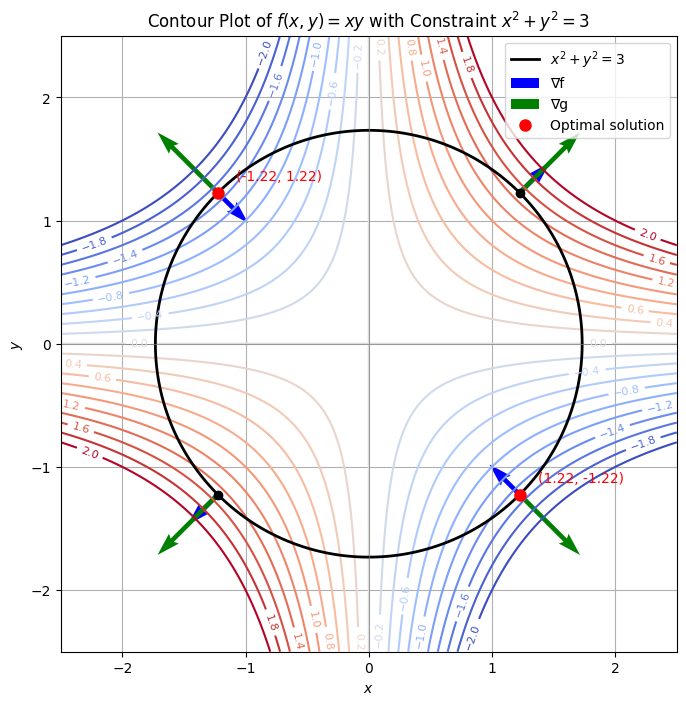

In [15]:
# Question-3 part 1

# Define the objective function: f(x, y) = x * y
def f_obj(x, y):
    return x * y

# Define the constraint: x^2 + y^2 = 3 → represented as g(x, y) = 0
def g_constraint(x, y):
    return x**2 + y**2 - 3

# Create grid over the domain manually
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X = np.zeros((400, 400))
Y = np.zeros((400, 400))

for i in range(400):
    for j in range(400):
        X[i][j] = x_vals[j]
        Y[i][j] = y_vals[i]

# Evaluate objective function f(x, y) = xy over the grid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = f_obj(X[i][j], Y[i][j])

# Create constraint circle using parametric equation
r = np.sqrt(3)
theta = np.linspace(0, 2 * np.pi, 500)
circle_x = r * np.cos(theta)
circle_y = r * np.sin(theta)

# Manually define optimal points where xy is minimized
x_opt = np.sqrt(3 / 2)
opt_points = [
    (x_opt, -x_opt),
    (-x_opt, x_opt),
    (x_opt, x_opt),
    (-x_opt, -x_opt)
]

# Start plotting
plt.figure(figsize=(8, 8))

# Plot contours of f(x, y) = xy
contour_plot = plt.contour(X, Y, Z, levels=np.linspace(-2, 2, 21), cmap='coolwarm')
plt.clabel(contour_plot, inline=True, fontsize=8)

# Plot constraint using contour of g(x, y) = 0
G = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        G[i][j] = g_constraint(X[i][j], Y[i][j])
plt.contour(X, Y, G, levels=[0], colors='black', linewidths=2)

# Proxy line for legend (constraint circle)
constraint_proxy = mlines.Line2D([], [], color='black', linewidth=2, label=r"$x^2 + y^2 = 3$")

# Plot gradients and optimal points
for (x0, y0) in opt_points:
    plt.plot(x0, y0, 'ko')  # Base point

    grad_f_x = y0
    grad_f_y = x0
    grad_g_x = 2 * x0
    grad_g_y = 2 * y0

    plt.quiver(x0, y0, grad_f_x, grad_f_y, angles='xy', scale_units='xy', scale=5, color='blue', label='∇f' if (x0, y0)==opt_points[0] else "")
    plt.quiver(x0, y0, grad_g_x, grad_g_y, angles='xy', scale_units='xy', scale=5, color='green', label='∇g' if (x0, y0)==opt_points[0] else "")

# Highlight global minima with red circles
for (x0, y0) in opt_points:
    if f_obj(x0, y0) < 0:
        plt.plot(x0, y0, 'ro', markersize=8, label='Optimal solution' if (x0, y0)==opt_points[0] else "")
        plt.text(x0 + 0.15, y0 + 0.1, f"\n({x0:.2f}, {y0:.2f})", fontsize=10, color='red')

# Axes and formatting
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Contour Plot of $f(x, y) = xy$ with Constraint $x^2 + y^2 = 3$')

# Legend
plt.legend(handles=[constraint_proxy, *plt.gca().get_legend_handles_labels()[0]])
plt.grid(True)
plt.show()

In [16]:
# Quesstion-3 part 4
# Reuse previous function definitions (objective and constraint)
def f_obj(x, y):
    return x * y

def g_constraint(x, y):
    return x**2 + y**2 - 3

# Wrapper for the objective function (since minimize expects a single vector input)
def objective(x):
    return f_obj(x[0], x[1])

# Wrapper for the constraint (equality form): x^2 + y^2 - 3 = 0
def constraint_eq(x):
    return g_constraint(x[0], x[1])

# Initial guess for optimization (taken close to the visual solution)
x0 = [np.sqrt(3 / 2), -np.sqrt(3 / 2)]

# Define constraint as required by scipy.optimize
constraint = {
    'type': 'eq',
    'fun': constraint_eq
}

# Call the optimizer with the objective and the equality constraint
result = minimize(objective, x0, constraints=[constraint])

# Print results from the optimization
print("Optimized x:", result.x)
print("Objective value:", result.fun)
print("Constraint satisfied:", np.isclose(constraint_eq(result.x), 0))

Optimized x: [ 1.22474487 -1.22474487]
Objective value: -1.4999999999999998
Constraint satisfied: True


In [17]:
# Question-4 part 1

# Manually create plotting grid
x1 = np.linspace(-2, 8, 400)
x2 = np.linspace(-6, 6, 400)
X1, X2 = np.meshgrid(x1, x2)

# Compute the values of the objective function f(x1, x2) = x1^2 + x2^2
Z = X1**2 + X2**2

# First constraint: x1 - 7 ≤ 0 → becomes C1 = x1 - 7
C1 = X1 - 7

# Second constraint: -x1 + x2^2/4 + 4 ≤ 0 → becomes C2 = -x1 + (x2^2)/4 + 4
C2 = -X1 + (X2**2) / 4 + 4

# Start figure
plt.figure(figsize=(8, 8))

# Draw level curves of the objective function
contours = plt.contour(X1, X2, Z, levels=np.linspace(0, 100, 20), cmap='coolwarm')
plt.clabel(contours, inline=True, fontsize=8)

# Plot shaded feasible region where both constraints hold
region_mask = np.logical_and(C1 <= 0, C2 <= 0)
plt.contourf(X1, X2, region_mask, levels=1, colors=['#d0f0d0'], alpha=0.6)

# Plot constraint boundary lines (no labels attached directly)
contour1 = plt.contour(X1, X2, C1, levels=[0], colors='white', linewidths=2, linestyles='--')
contour2 = plt.contour(X1, X2, C2, levels=[0], colors='violet', linewidths=2, linestyles='--')

# Approximate optimal point visually identified
opt_x1 = 4
opt_x2 = 0
plt.plot(opt_x1, opt_x2, 'ro', markersize=8)
plt.text(opt_x1 + 0.3, opt_x2 + 0.3, f"({opt_x1}, {opt_x2})", fontsize=9, color='red')

# Create custom legend manually using proxy handles
custom_lines = [
    Line2D([0], [0], color='white', linestyle='--', linewidth=2, label=r'$x_1 = 7$ (from $x_1 - 7 \leq 0$)'),
    Line2D([0], [0], color='violet', linestyle='--', linewidth=2, label=r'$x_1 = \frac{x_2^2}{4} + 4$ (from $-x_1 + \frac{x_2^2}{4} + 4 \leq 0$)'),
    Line2D([0], [0], marker='o', color='red', linestyle='None', markersize=8, label='Optimal point')
]

plt.legend(handles=custom_lines, loc='upper right')

# Add axes labels and visual adjustments
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Contour Plot with Feasible Region and Constraints')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

In [18]:
# Question-4 part 4

# Define 2-dimensional decision variable (x1 and x2)
x = cp.Variable(2)

# Objective: minimize x1^2 + x2^2 → use sum of squares
objective = cp.Minimize(cp.sum_squares(x))

# First constraint: x1 ≤ 7 → written as x[0] - 7 ≤ 0
# Second constraint: -x1 + (x2^2)/4 + 4 ≤ 0
constraints = [
    x[0] - 7 <= 0,
    -x[0] + (x[1]**2) / 4 + 4 <= 0
]

# Create and solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Show optimal solution and objective value
print("Optimal x:", x.value)
print("Optimal objective value:", problem.value)

# Get the Lagrange multipliers (dual values) for each constraint
print("Dual values (λ₁, λ₂):", [constraints[0].dual_value, constraints[1].dual_value])

Optimal x: [4. 0.]
Optimal objective value: 15.999999999185032
Dual values (λ₁, λ₂): [7.423107864159722e-10, 8.000000000538572]
